In [11]:
import numpy as np 
import matplotlib.pyplot as plt

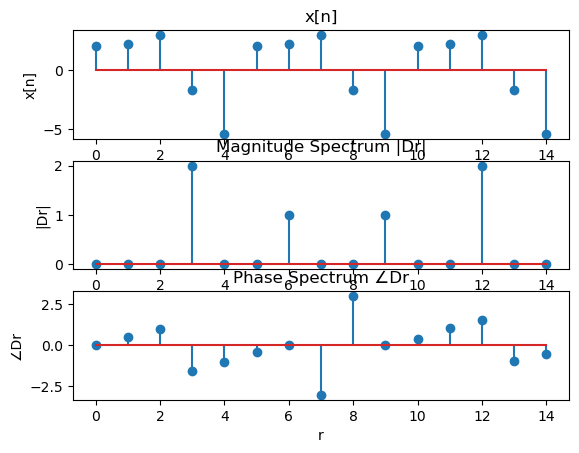

In [4]:
#A.2
N = 15  
n = np.arange(N)
x_n = 4 * np.sin(2.4 * np.pi * n) + 2 * np.cos(3.2 * np.pi * n)


X_r = np.fft.fft(x_n) / N  
r = np.arange(N) 

magnitude = np.abs(X_r)
phase = np.angle(X_r)


plt.figure()
plt.subplot(3, 1, 1)
plt.stem(n, x_n)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')


plt.subplot(3, 1, 2)
plt.stem(r, magnitude)
plt.title('Magnitude Spectrum |Dr|')
plt.xlabel('r')
plt.ylabel('|Dr|')


plt.subplot(3, 1, 3)
plt.stem(r, phase)
plt.title('Phase Spectrum ∠Dr')
plt.xlabel('r')
plt.ylabel('∠Dr')
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_8272\614858133.py:12: RuntimeWarning: divide by zero encountered in divide
  X_r= np.fft.fft(y(n))/n
C:\Users\chris\AppData\Local\Temp\ipykernel_8272\614858133.py:12: RuntimeWarning: invalid value encountered in divide
  X_r= np.fft.fft(y(n))/n


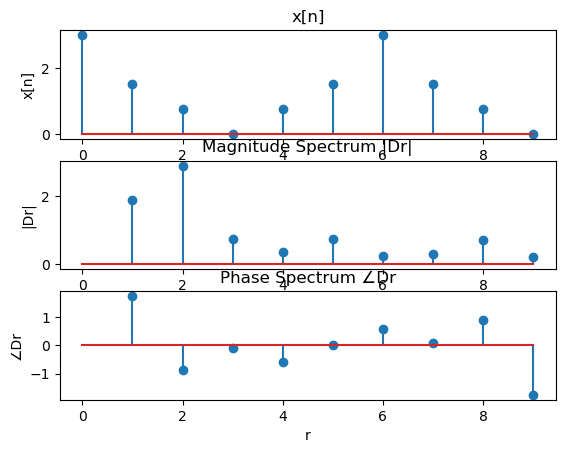

In [28]:
#A.3
N=10
n = np.arange(N)
def impulsefn(n):
    return np.where(n==0,1,0)


def y(n):
    return 3*np.cos(2*np.pi*(1/6)*n)+2.25*impulsefn(n-2)+3*impulsefn(n-3)+2.25*impulsefn(n-4)+2.25*impulsefn(n-8)+3*impulsefn(n-9)


X_r= np.fft.fft(y(n))/n
r = np.arange(N)
magnitude = np.abs(X_r)
phase = np.angle(X_r)

plt.figure()
plt.subplot(3, 1, 1)
plt.stem(n, y(n))
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')


plt.subplot(3, 1, 2)
plt.stem(r, magnitude)
plt.title('Magnitude Spectrum |Dr|')
plt.xlabel('r')
plt.ylabel('|Dr|')


plt.subplot(3, 1, 3)
plt.stem(r, phase)
plt.title('Phase Spectrum ∠Dr')
plt.xlabel('r')
plt.ylabel('∠Dr')
plt.show()

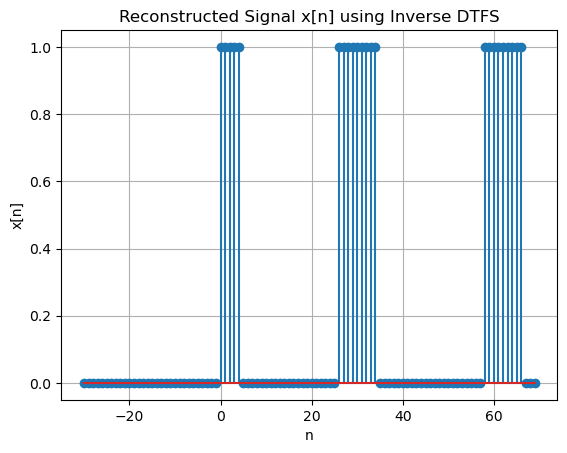

In [37]:
#B.1
x = np.arange(-30, 70)


def u(n):
    unit = np.array([])
    for sample in n:
        if sample <= -26 and sample >= -36 or sample <= 4 and sample >= -4 or sample <= 36 and sample >= 28:
            unit = np.append(unit, 1)
        else:
            unit = np.append(unit, 0)
    return unit


signal = u(x)


N = len(signal)  
k = np.arange(N)
X = np.fft.fft(signal) / N  


n = np.arange(-30, 70)
reconstructed_signal = np.zeros_like(n, dtype=complex)
for i in range(N):
    reconstructed_signal += X[i] * np.exp(1j * 2 * np.pi * i * n / N)

reconstructed_signal = np.real(reconstructed_signal)

plt.figure()
plt.stem(n, reconstructed_signal)
plt.title('Reconstructed Signal x[n] using Inverse DTFS')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)
plt.show()

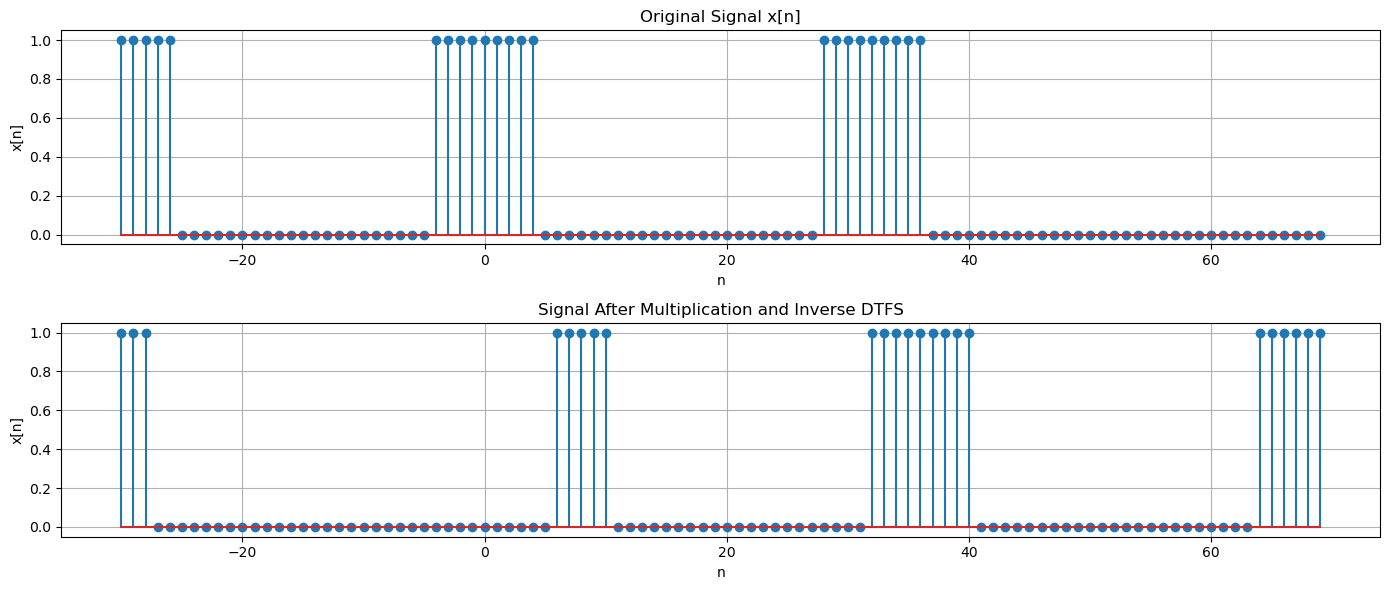

In [46]:
#B.2
x = np.arange(-30, 70)


def u(n):
    unit = np.array([])
    for sample in n:
        if sample <= -26 and sample >= -36 or sample <= 4 and sample >= -4 or sample <= 36 and sample >= 28:
            unit = np.append(unit, 1)
        else:
            unit = np.append(unit, 0)
    return unit


signal = u(x)


N = len(signal)  
X = np.fft.fft(signal) / N  


omega_0 = 2 * np.pi / N
r = np.arange(N)
D=5 #from student number
multiplication_factor = np.exp(-1j * (D + 1) * omega_0 * r)


X_modified = X * multiplication_factor

reconstructed_signal_modified = np.zeros_like(x, dtype=complex)
for i in range(N):
    reconstructed_signal_modified += X_modified[i] * np.exp(1j * 2 * np.pi * i * x / N)

reconstructed_signal_modified = np.real(reconstructed_signal_modified)


plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.stem(x, signal)
plt.title('Original Signal x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(x, reconstructed_signal_modified)
plt.title('Signal After Multiplication and Inverse DTFS')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

plt.tight_layout()
plt.show()

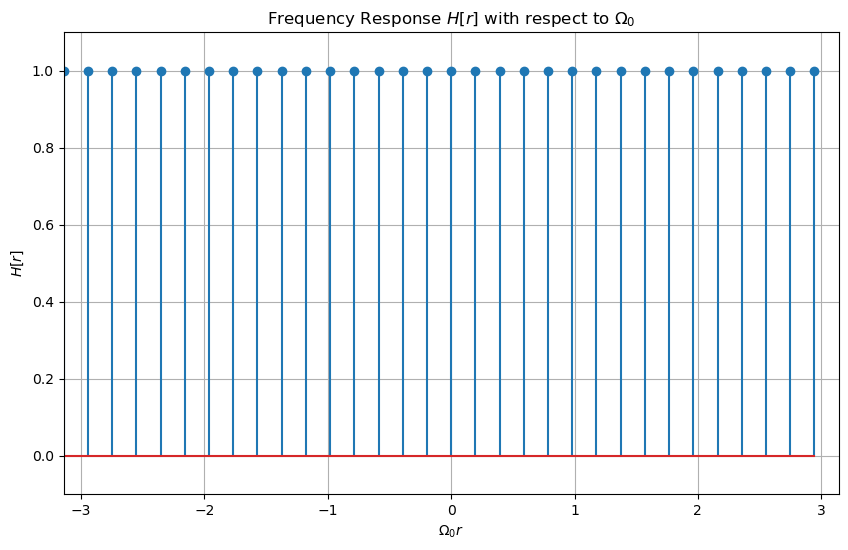

In [42]:
#C.1
def H(r):
    unit = np.array([])
    for sample in r:
        if sample <= 4 or sample >= -4:
            unit = np.append(unit, 1)
        else:
            unit = np.append(unit, 0)
    return unit


N0 = 32
omega_0 = 2 * np.pi / N0


r = np.arange(-N0//2, N0//2)

H_r = H(r)


frequency_axis = r * omega_0


plt.figure()
plt.stem(frequency_axis, H_r)
plt.title(r'Frequency Response $H[r]$ with respect to $\Omega_0$')
plt.xlabel(r'$\Omega_0 r$')
plt.ylabel(r'$H[r]$')
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.ylim(-0.1, 1.1)
plt.show()

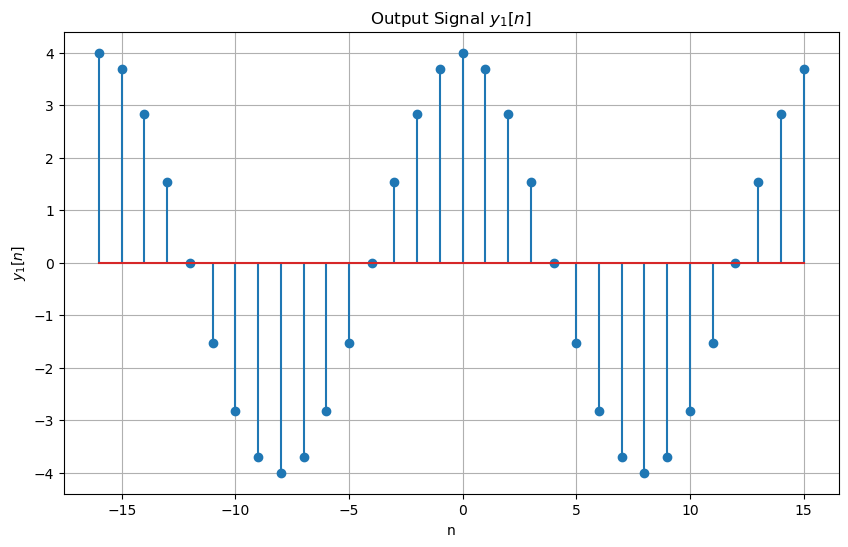

In [43]:
#C.2
def H(r):
    unit = np.array([])
    for sample in r:
        if sample <= 4 or sample >= -4:
            unit = np.append(unit, 1)
        else:
            unit = np.append(unit, 0)
    return unit


N0 = 32
omega_0 = 2 * np.pi / N0


r = np.arange(-N0//2, N0//2)

H_r = H(r)

def x1(n):
    return 4 * np.cos(np.pi * n / 8)


n = np.arange(-N0//2, N0//2)
x1_n = x1(n)
X1_r = np.fft.fft(x1_n) / N0  


Y1_r = X1_r * H_r

reconstructed_signal_y1 = np.zeros_like(n, dtype=complex)
for i in range(N0):
    reconstructed_signal_y1 += Y1_r[i] * np.exp(1j * 2 * np.pi * i * n / N0)

y1_n = np.real(reconstructed_signal_y1)


plt.figure()
plt.stem(n, y1_n)
plt.title('Output Signal $y_1[n]$')
plt.xlabel('n')
plt.ylabel('$y_1[n]$')
plt.grid(True)
plt.show()


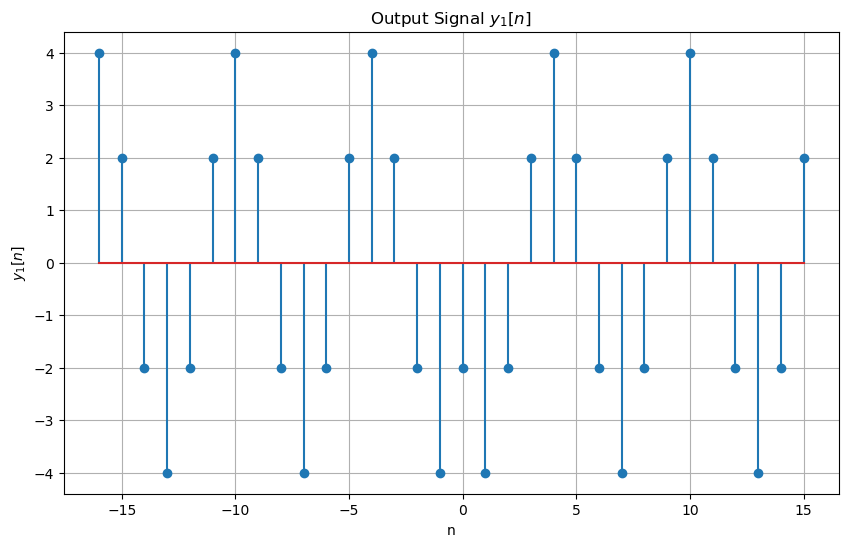

In [45]:
#C.3
def H(r):
    unit = np.array([])
    for sample in r:
        if sample <= 4 or sample >= -4:
            unit = np.append(unit, 1)
        else:
            unit = np.append(unit, 0)
    return unit

def x1(n):
    return 4 * np.cos(np.pi * n / 3)

r = np.arange(-N0//2, N0//2)
x1_n = x1(r)
X1_r = np.fft.fft(x1_n) / N0

H_r = H(r)

Y1_r = X1_r * H_r

y1_n = np.zeros_like(r, dtype=complex)
for i in range(N0):
    y1_n += Y1_r[i] * np.exp(1j * 2 * np.pi * i * r / N0)


y1_n = np.real(y1_n)

plt.figure()
plt.stem(r, y1_n)
plt.title('Output Signal $y_1[n]$')
plt.xlabel('n')
plt.ylabel('$y_1[n]$')
plt.grid(True)
plt.show()